In [7]:
#!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv


--2023-12-31 07:38:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.07s   

2023-12-31 07:38:27 (1.03 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df=pd.read_csv("/content/FuelConsumption.csv")

In [41]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [11]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [12]:
cdf=df[["ENGINESIZE","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]

In [13]:
cdf

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244
...,...,...,...,...,...
1062,3.0,13.4,9.8,11.8,271
1063,3.2,13.2,9.5,11.5,264
1064,3.0,13.4,9.8,11.8,271
1065,3.2,12.9,9.3,11.3,260


array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'FUELCONSUMPTION_CITY'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

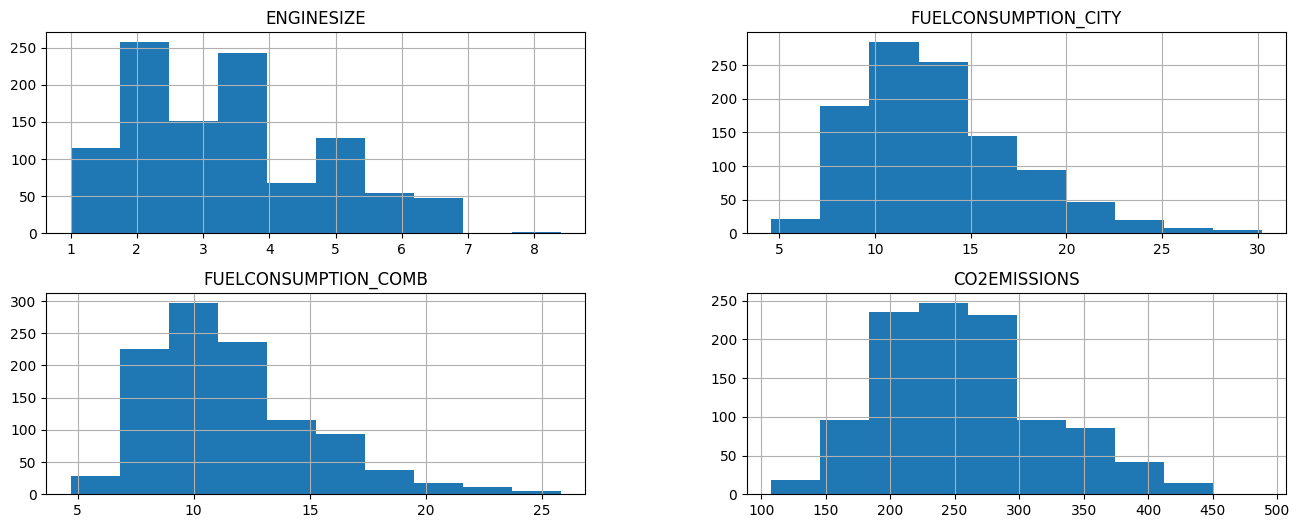

In [14]:
plt.rcParams["figure.figsize"]=(16,6)
viz=cdf[["ENGINESIZE","FUELCONSUMPTION_CITY","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
viz.hist()

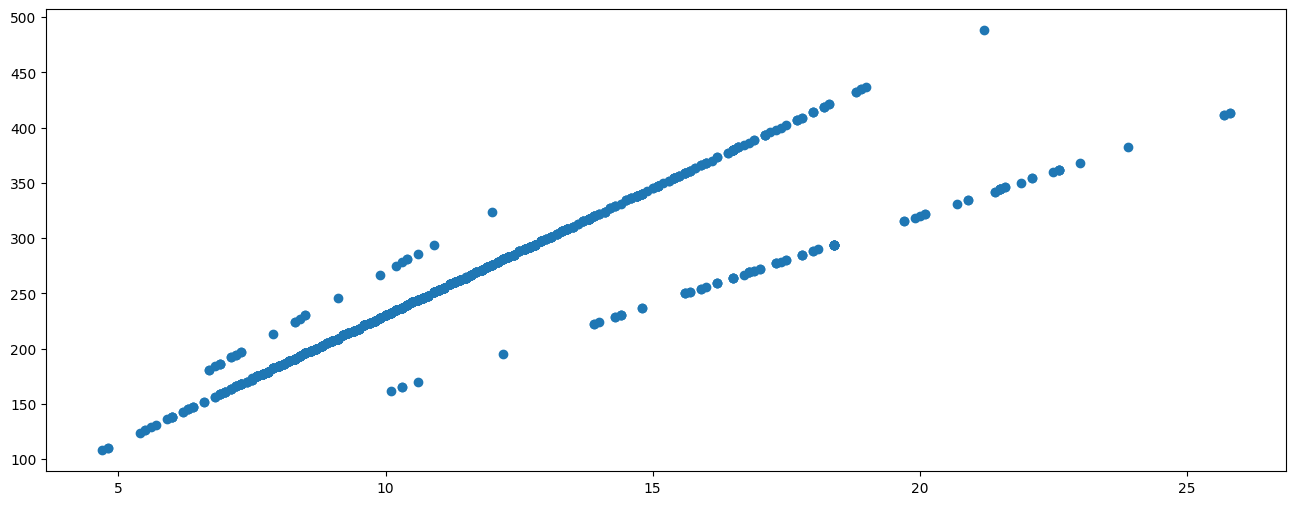

In [15]:
plt.scatter(x=cdf.FUELCONSUMPTION_COMB,y=cdf.CO2EMISSIONS)

Text(0, 0.5, 'Enginsize')

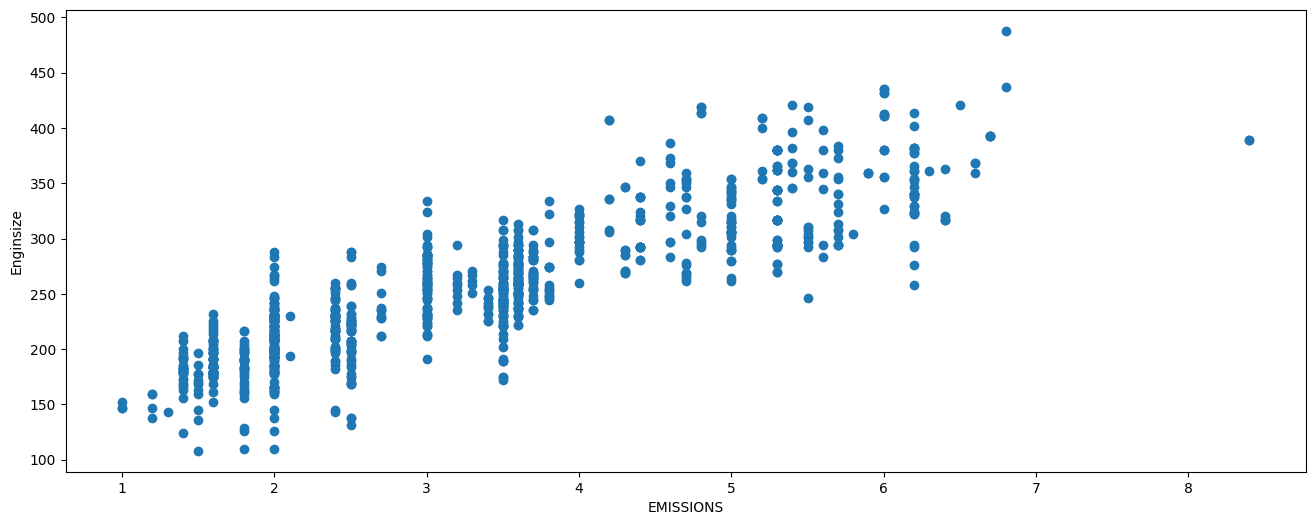

In [16]:
plt.scatter(x=cdf.ENGINESIZE,y=cdf.CO2EMISSIONS)
plt.xlabel("EMISSIONS")
plt.ylabel("Enginsize")

<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

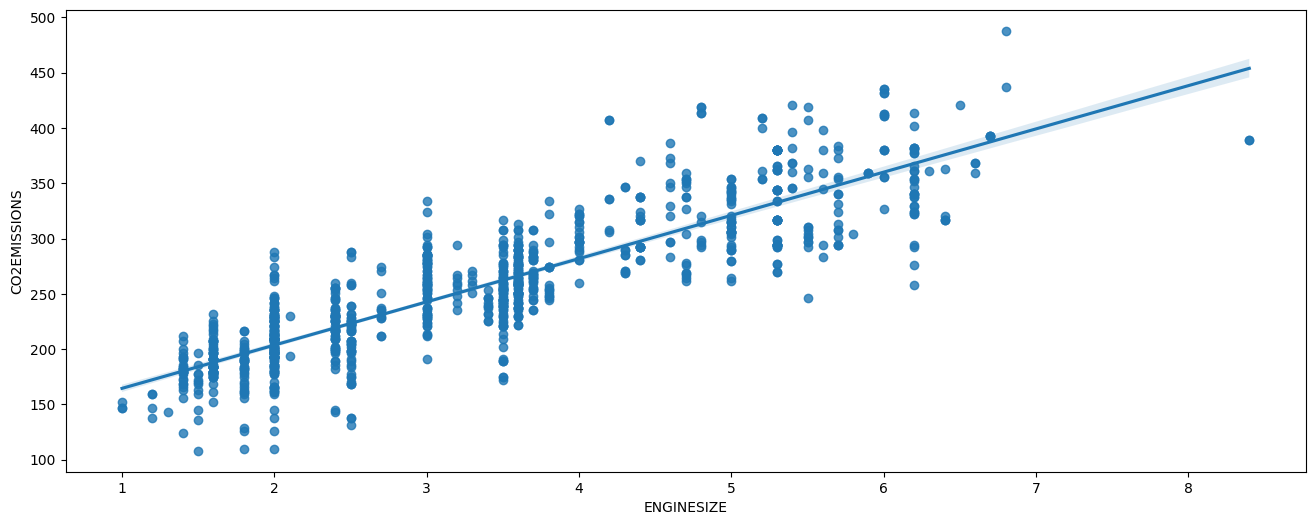

In [17]:
import seaborn as sns
sns.regplot(x=df["ENGINESIZE"],y=df["CO2EMISSIONS"])

Text(0, 0.5, 'Emissions')

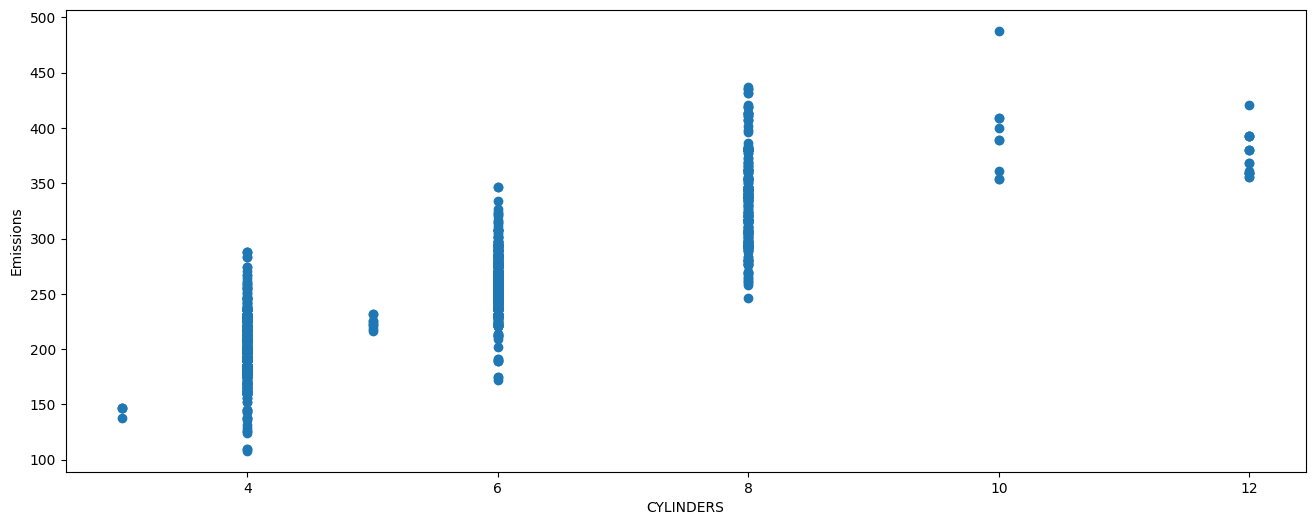

In [18]:
plt.scatter(x=df.CYLINDERS, y=cdf.CO2EMISSIONS)
plt.xlabel("CYLINDERS")
plt.ylabel("Emissions")

In [42]:
msk=np.random.rand(len(df))< 0.8
train=df[msk]
test=df[~msk]

Text(0, 0.5, 'Emissions')

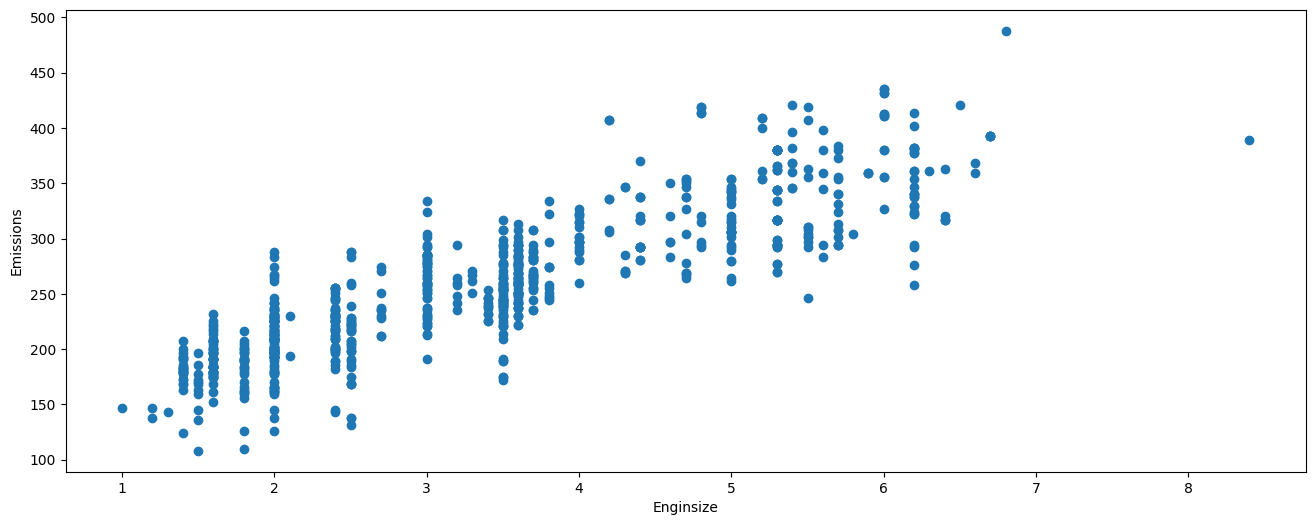

In [24]:
plt.scatter(x=train.ENGINESIZE,y=train.CO2EMISSIONS)
plt.xlabel("Enginsize")
plt.ylabel("Emissions")

Text(0, 0.5, 'Emissions')

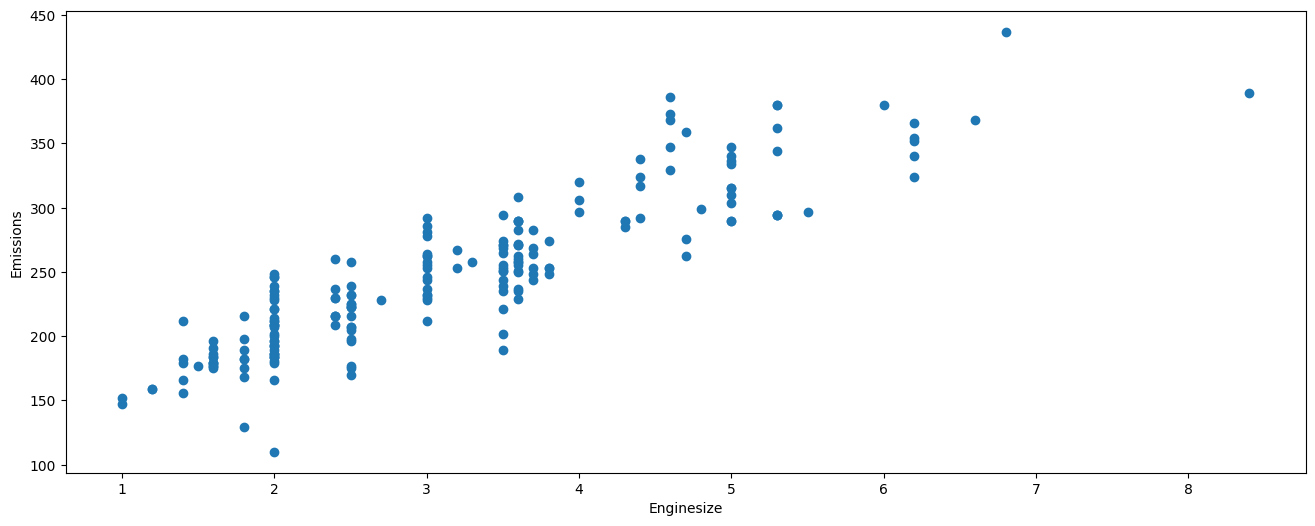

In [25]:
plt.scatter(x=test.ENGINESIZE,y=test.CO2EMISSIONS)
plt.xlabel("Enginesize")
plt.ylabel("Emissions")

In [43]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x,train_y)

LinearRegression()

In [44]:
print(regr.intercept_)
print(regr.coef_)

[125.75041034]
[[38.95923617]]


# Model evaluation metrics


*   MEAN ABSOLUTE ERROR
*   MEAN SQUARED ERROR

*   ROOT MEAN SQUARED ERROR





In [45]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[["ENGINESIZE"]])
test_y=np.asanyarray(test[["CO2EMISSIONS"]]) # real test_y values
predicted=regr.predict(test_x) #we are going to predict test_y values to compare them

In [46]:
import sklearn.pipeline as Pipeline

In [47]:
print("MEAN ABSOLUTE ERROR: %.2f" %np.mean(np.absolute(predicted - test_y)))
print("Residual sum of squares %.2f" % np.mean((predicted-test_y)**2))
print("R2-score:%.2f"%r2_score(predicted,test_y))

MEAN ABSOLUTE ERROR: 21.42
Residual sum of squares 798.32
R2-score:0.71


In [48]:
X_train=np.asanyarray(train[["FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"]])
y_train=np.asanyarray(train[["CO2EMISSIONS"]])
ridge=linear_model.Ridge(alpha=.3)
ridge.fit(X_train,y_train)
predict_ridge=ridge.predict(X_test)

In [49]:
X_test=np.asanyarray(test[["FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"]])
y_test=np.asanyarray(test[["CO2EMISSIONS"]])
predicted=ridge.predict(X_test)


In [50]:
print("MEAN ABSOLUTE ERROR:",np.mean(np.absolute(predicted-y_test)))
print("Resudal sum of squares",np.mean((predicted-y_test)**2))
print("R2-score:",r2_score(predicted,y_test))

MEAN ABSOLUTE ERROR: 18.490037618407708
Resudal sum of squares 754.2689568739921
R2-score: 0.7582448217961952


In [51]:
lasso=linear_model.Lasso(alpha=.1)
lasso.fit(X_train,y_train)
prediction=lasso.predict(X_test)
print("MEAN ABSOLUTE ERROR:",np.mean(np.absolute(prediction-y_test)))

MEAN ABSOLUTE ERROR: 64.13510280551178


In [60]:
from re import X
X_train=np.asanyarray(train[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
y_train=np.asanyarray(train[["CO2EMISSIONS"]])
X_test=np.asanyarray(test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
y_test=np.asanyarray(test[["CO2EMISSIONS"]])
model=linear_model.LinearRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print("mean absolute error",np.mean(np.absolute(prediction-y_test)))

mean absolute error 15.465184034058534
r2_score 0.8549458647112408


In [59]:
X_train=np.asanyarray(train[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_HWY","FUELCONSUMPTION_CITY"]])
y_train=np.asanyarray(train[["CO2EMISSIONS"]])
X_test=np.asanyarray(test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_HWY","FUELCONSUMPTION_CITY"]])
y_test=np.asanyarray(test[["CO2EMISSIONS"]])
model=linear_model.LinearRegression()
model.fit(X_train,y_train)
prediciton=model.predict(X_test)
print("mean absolute error",np.mean(np.absolute(prediciton-y_test)))

mean absolute error 15.552629125903406
